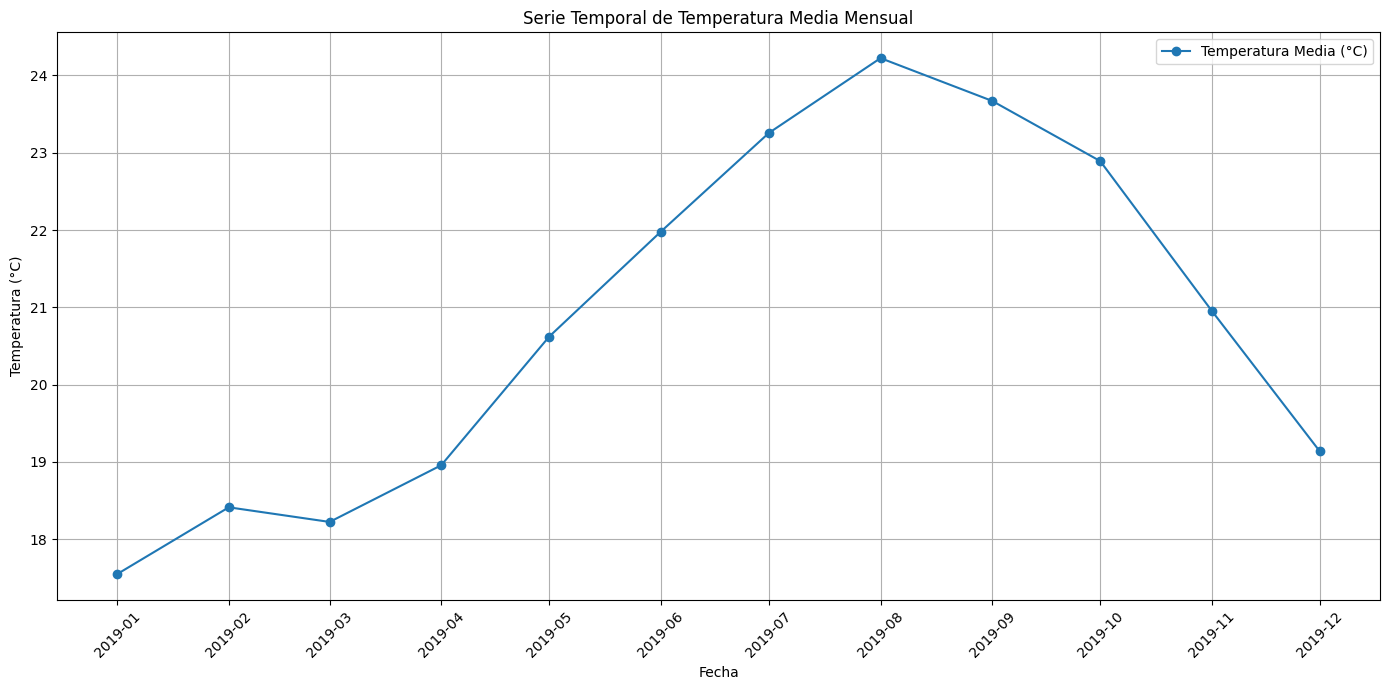

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar los datos
data = pd.read_csv('GCLP_All.csv')

# Convertir las columnas de fecha de texto a tipo datetime
data['dateTime'] = pd.to_datetime(data['dateTime'])

# Crear una columna 'YearMonth' para agrupar los datos por mes
data['YearMonth'] = data['dateTime'].dt.to_period('M').dt.to_timestamp()

# Filtrar datos para asegurarse que la temperatura no sea nula y agrupar por 'YearMonth'
temperature_data = data[['YearMonth', 'temperature']].dropna()
monthly_temperature = temperature_data.groupby('YearMonth').mean().reset_index()

# Crear la serie temporal de temperatura
plt.figure(figsize=(14, 7))
plt.plot(monthly_temperature['YearMonth'], monthly_temperature['temperature'], label='Temperatura Media (°C)', color='tab:blue', marker='o')

# Configurar el formato del eje X para mostrar todos los meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

plt.title('Serie Temporal de Temperatura Media Mensual')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()  # Ajustar automáticamente los parámetros del subplot para dar espacio a las etiquetas
plt.show()
